In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

In [7]:
city_ride_df = pd.merge(city_data_to_load, ride_data_to_load, on="city")
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
type_city = city_ride_df.groupby('city')['type'].count()
type_city

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [9]:
fare = city_ride_df.groupby('city')["fare"].mean()
fare.max()

43.278333333333336

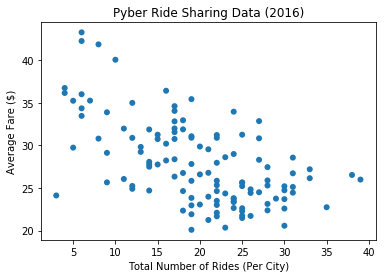

In [29]:
#Scatter/Bubble plot
# Obtain the x and y coordinates for each of the three city types
# y coordinate = fare
# x coordinate = number of rides per city (count of urban, suburban, and rural per city)
# bubble types = type
# circle size = driver count per city

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

# The maximum x value for our chart will be 100
#x_limit = 44

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)

type_city = city_ride_df.groupby('city')['type'].count()
fare = city_ride_df.groupby('city')["fare"].mean()
driver = city_ride_df.groupby('city')['driver_count']
#x_limit = driver
#x_axis = np.arange(0, driver, 1)
plt.scatter(type_city, fare, edgecolors='none')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()


#d = pd.read_csv('sealevel.csv')
#year = d['YEAR']
#sea_levels = d['CSIRO_SEALEVEL_INCHES']
#plt.scatter(year, sea_levels, edgecolors='r')
#plt.xlabel('Year')
#plt.ylabel('Sea Level (inches)')
#plt.title('Rise in Sealevel')
#plt.show()


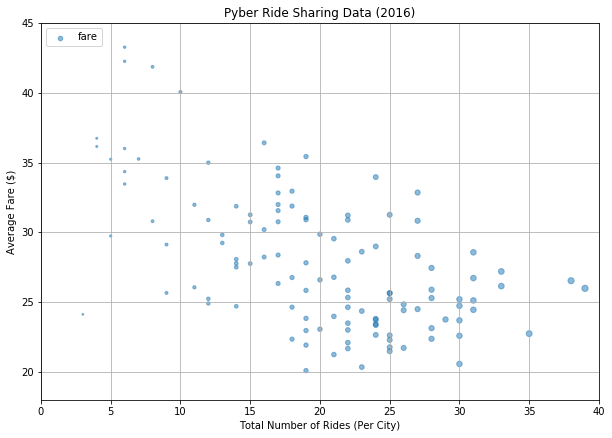

In [41]:
type_city = city_ride_df.groupby('city')['type'].count()
#driver = city_ride_df.groupby('city')['driver_count'].count()
#fare = city_ride_df.groupby('city')['fare'].mean()[driver]
fare = city_ride_df.groupby('city')["fare"].mean()
driver = city_ride_df.groupby('city')['driver_count'].count()
#x_limit = driver
#x_axis = np.arange(0, driver, 1)

fig = plt.figure(facecolor='white', figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
ax.grid(True)
scatter = ax.scatter(type_city, fare, s=driver, alpha=0.5)
ax.axis([0, 40, 18, 45])
fig.canvas.draw()
#scatter.set_sizes(driver)
#plt.scatter(type_city, fare, edgecolors='none')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc=2)
plt.show()


#plt.close('all')

# Generate some data :
#N = 25
#x = np.random.rand(N) + 0.5
#y = np.random.rand(N) + 0.5
#r = np.random.rand(N)/10

# Plot the data :
#fig = plt.figure(facecolor='white', figsize=(7, 7))
#ax = fig.add_subplot(111, aspect='equal')
#ax.grid(True)
#scat = ax.scatter(x, y, s=0, alpha=0.5, clip_on=False)
#ax.axis([0, 2, 0, 2])

# Draw figure :
#fig.canvas.draw()

# Calculate radius in pixels :
#rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          #ax.transData.transform(np.vstack([np.zeros(N), np.zeros(N)]).T))
#rpix, _ = rr_pix.T

# Calculate and update size in points:
#size_pt = (2*rpix/fig.dpi*72)**2
#scat.set_sizes(size_pt)

# Save and show figure:
#fig.savefig('scatter_size_axes.png')
#plt.show()

In [10]:
fares = city_ride_df.groupby('type')['fare'].sum()
fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

(-1.116703110300783,
 1.1972665181295887,
 -1.1123788195269562,
 1.1610996706073955)

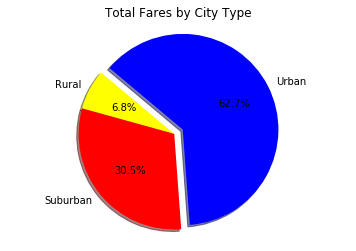

In [18]:
#Total Fares by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
fares = city_ride_df.groupby('type')['fare'].sum()
colors = ["yellow", "red", "blue"]
explode = [0, 0, .1]
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
plt.axis("equal")

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

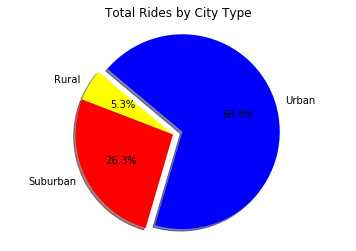

In [19]:
#Total Rides by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
rides = city_ride_df.groupby('type')['ride_id'].count()
colors = ["yellow", "red", "blue"]
explode = [0, 0, .1]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
plt.axis("equal")

(-1.114016675906232,
 1.2065029408549544,
 -1.134035012314224,
 1.0785783188700298)

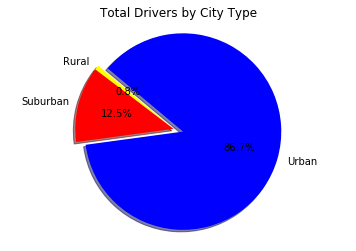

In [20]:
#Total Drivers by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
drivers = city_ride_df.groupby('type')['driver_count'].sum()
colors = ["yellow", "red", "blue"]
explode = [0, 0, .2]
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")
plt.axis("equal")